Single mutations 2437
Double mutations 3419
Beneficial single mutations 1393
Beneficial double mutations 1800
0.825


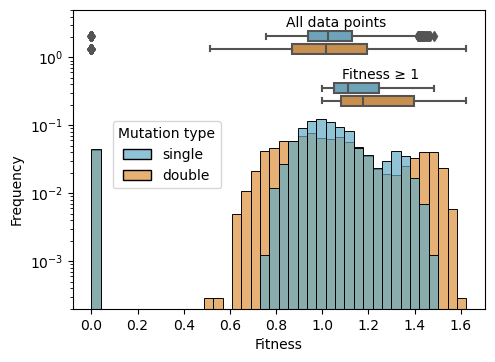

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = "../../../Data_P53/data_P53.txt"
# Update this to your actual file path
data = pd.read_csv(data_path, sep=",")
# Data cleaning and preparation
data = data.dropna(subset=['mutation'])
data['type'] = data['mutation'].replace({'tandem': 'double', 'single': 'single'})
filtered_data = data[data['fitness'] > 1]

print("Single mutations", len(data[data['type'] == "single"]))
print("Double mutations", len(data[data['type'] == "double"]))

print("Beneficial single mutations", len(data[(data['type'] == "single") & (data['fitness'] > 1)]))
print("Beneficial double mutations", len(data[(data['type'] == "double") & (data['fitness'] > 1)]))

# Create a new figure for the histogram without a title and grid
#fig, ax_main = plt.subplots(figsize=(3.85, 2.77))
fig, ax_main = plt.subplots(figsize=(5, 3.6))

# Adjust subplots
plt.subplots_adjust(
    #left=0.165,  # Adjust if necessary
    #bottom=0.15,  # Adjust if necessary, especially if the x-label is cut off
    left=None,  # Adjust if necessary
    bottom=0.12,  # Adjust if necessary, especially if the x-label is cut off
    right=0.95,  # Adjust if necessary
    top=0.95,  # Decrease this to reduce space at the top of the figure
    wspace=None,  # Adjust the width of the space between subplots
    hspace=None   # Adjust the height of the space between subplots
)


# Main histogram plot with visible axes
sns.histplot(data=data, x="fitness", hue="type", bins=40, palette=["#62AAC5", "#DD903B"],
             log_scale=(False, True), hue_order=['single', 'double'], stat='probability', legend=True,
             alpha=0.7, common_norm=False, ax=ax_main)

# Adjust the legend position
legend = ax_main.get_legend()
legend.set_title("Mutation type")
legend.set_frame_on(True)
legend.set_bbox_to_anchor((0.08, 0.65))  # Adjust x and y for precise positioning


# Dynamically get the position of the histogram
pos = ax_main.get_position()
left, width = pos.x0, pos.width

# Customization and cleaning
ax_main.grid(False)  # Remove grid
ax_main.set_ylim(2*10**(-4), 5)  # Custom y-axis range

# Set tick size for x and y axis individually
ax_main.tick_params(axis='x', labelsize=10)  # Set x-axis tick size
ax_main.tick_params(axis='y', labelsize=10)  # Set y-axis tick size


# Adding box plots
def add_boxplot(ax, data, pos, height=0.07, title="", y_title_offset=0.0, x_title_offset=1.0):
    # pos is in the form [left, bottom, width, height]
    ax_box = fig.add_axes([pos[0], pos[1], pos[2], height], frame_on=False)
    sns.boxplot(data=data, x="fitness", y="type", palette=["#62AAC5", "#DD903B"], order=['single', 'double'],
                showmeans=False, meanprops={"markerfacecolor": "black", "markeredgecolor": "black"}, ax=ax_box)
    ax_box.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])
    ax_main.set_xlabel("Fitness")
    ax_main.set_ylabel('Frequency')
    ax_main.yaxis.label.set_position((0, 0.4))  # Adjust the main y-axis label position
    ax_box.xaxis.set_visible(False)
    ax_box.yaxis.set_visible(False)
    ax_box.set_xlim(ax.get_xlim())
    ax_box.text(x_title_offset, 1 + y_title_offset, title, fontsize=10, transform=ax_box.transAxes, verticalalignment='bottom', horizontalalignment='right')

# Adding box plots with adjusted titles
add_boxplot(ax_main, data, pos=[left, 0.825, width], height=0.07, title="All data points", y_title_offset=0., x_title_offset=0.76)
add_boxplot(ax_main, filtered_data, pos=[left, 0.68, width], height=0.07, title="Fitness \u2265 1", y_title_offset=0., x_title_offset=0.84)

print(width)

# Save and show the plot
plt.savefig("P53_Dist.pdf", transparent=True)

plt.show()


In [5]:
# Load the data
data_path = "../../../Data_P53/data_P53.txt"
# Update this to your actual file path
data = pd.read_csv(data_path, sep=",")
# Data cleaning and preparation
data = data.dropna(subset=['mutation'])

# Find the fittest single mutation value
fittest_single = data[data['mutation'] == 'single']['fitness'].max()

# Count the number of tandem mutations with fitness greater than the fittest single mutation
tandem_fitter_than_single_count = data[(data['mutation'] == 'tandem') & (data['fitness'] > fittest_single)].shape[0]

tandem_fitter_than_single_count


144